####**Estuardo J. Díaz García (22008995)**

---

# **Tarea 5: vectores en Numpy**

**Sección #1**: Términos a investigar

### **Proyección vectorial:**

Un vector se puede proyectar sobre otro vector o sobre un plano.
Coloquialmente, podríamos explicarlo como la "sombra" que un vector proyectaría sobre otro vector o sobre un plano.
Representándolo gráficamente, tenemos el vector **u** y el **v**, como aparecen abajo. Ambos se unen formando un ángulo alfa (α).

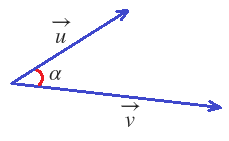

Fuente: https://ekuatio.com/

Al trazar una recta perpendicular desde el punto en donde finaliza el vector u hasta tocar al vector v se tendría el punto al cual llegaría la proyección de u sobre v.

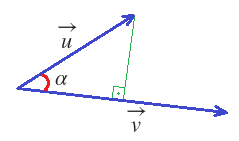

Fuente: https://ekuatio.com/

Ahora, al trazar un nuevo vector que iría del origen de ambos (u y v) hasta el punto en donde la línea perpendicular que trazamos toca al vector v obtendríamos el vector proyectado.

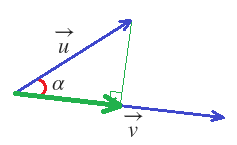

Fuente: https://ekuatio.com/

Esto, dependiendo de el ángulo entre ambos vectores, podría generar una proyección hacia la dirección contraria del vector sobre el cual se está proyectando.

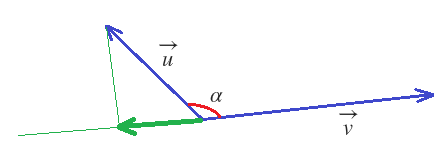
Fuente: https://ekuatio.com/

Para calcular la proyección del vector u sobre el vector v se utiliza la fórmula siguiente:
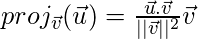



Text(0, 0.5, 'y')

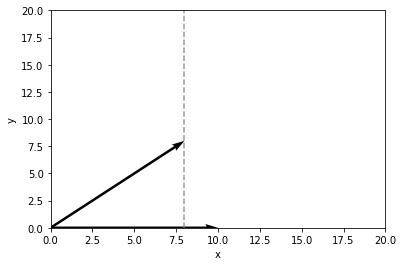

In [ ]:
#Ejemplo. Proyección vectorial
import numpy as np 
import matplotlib.pyplot as plt

#tenemos los vectores siguientes:
u=np.array([8,8])
v=np.array([10,0])

#los graficamos para una mejor visualización
plt.quiver([0,0],[0,0],[u[0],v[0]],[u[1],v[1]],scale_units="xy",angles="xy",scale=1)
plt.xlim(0,20)
plt.ylim(0,20)
plt.axvline(x=8,color="grey",linestyle="--", alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
#Determinamos la proyección del vector u sobre el vector v
producto_punto=u.dot(v)
magnitud_v = v.dot(v) #la magnitud del vector v al cuadrado
proyec_u_v=((producto_punto/magnitud_v)*v)
print(proyec_u_v)

[8. 0.]


In [ ]:
proyec_u_v.shape

(2,)

Text(0, 0.5, 'y')

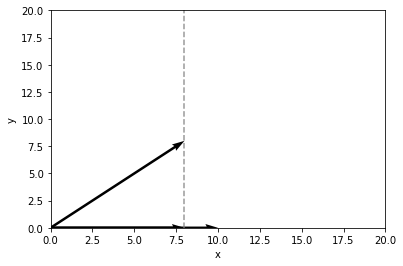

In [ ]:
#los graficamos nuevamente para una mejor visualización
plt.quiver([0,0,0],[0,0,0],[u[0],v[0],proyec_u_v[0]],[u[1],v[1],proyec_u_v[1]],scale_units="xy",angles="xy",scale=1)
plt.xlim(0,20)
plt.ylim(0,20)
plt.axvline(x=8,color="grey",linestyle="--", alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')

#vemos ahora que el nuevo vector "proyec_u_v" aparece ya en la gráfica

Un **ejemplo** de uso para la proyección vectorial 

### **Producto cruz o producto vectorial:**

El producto vectorial o producto cruz de dos vectores se representa como a x b (se interpreta como "a cruz b"). Matemáticamente, el producto cruz de un vector a por un vector v tendría la fórmula siguiente:


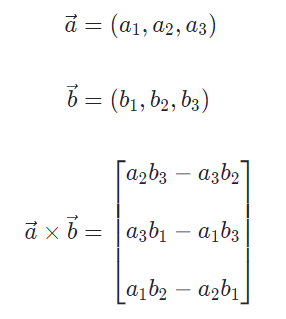

Fuente: Khan academy (https://es.khanacademy.org/)

In [ ]:
#Al tener vectores a y b
a = np.array([13,26,91])
b = np.array([25,-43,11])

#Obtenemos el producto cruz de a x b con la sentencia np.cross(a,b)
np.cross(a,b)

array([ 4199,  2132, -1209])

# **Ejercicios del Notebook #6**
---



**Ejercicio #1:**
ejercicio : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0. , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1. ]

El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

nota: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [ ]:
#Se crean 3 vectores con arange y luego se concatenan con np.hstack
a=np.arange(0.1,0.6,0.1,dtype=float)
b=np.arange(0.51,0.6,0.01,dtype=float)
c=np.arange(0.6,1.01,0.1,dtype=float)
np.hstack((a,b,c))

array([0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56,
       0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ])

**Ejercicio #2:**
Ejercicio (parte de tarea) En este caso usamos un ciclo para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for.

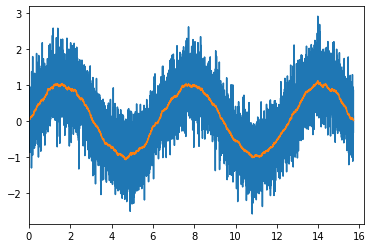

In [ ]:
sample_points = 10000
inicio_intervalo = 0
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(inicio_intervalo,5*np.pi,sample_points) 
y = np.sin(x) + ruido

import pandas as pd
#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()

longitud_filtro=150
media_movil=np.convolve(ys,np.ones((longitud_filtro)),mode="same")
media_movil /= longitud_filtro

plt.plot(x,y)
plt.plot(x,media_movil)
plt.xlim(inicio_intervalo,5*np.pi + 0.5)
plt.show()

**Ejercicio #3:**
Ejercicio Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5 , 0.31127812]

Nota: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

In [ ]:
#pendiente

**Ejercicio #4:**
Ejercicio: se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
$$c(x) = (x^{2} + x + log (0.0001x)-\sqrt{0.54x})/100$$

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función  **ganancia_neta(x,g,c)** donde:
* x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
* g = función que estima la ganancia en función de x
* c = función que estima el costo en función de x

La función realiza el calculo simple **g(x) - c(x)** , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [ ]:
def g(x): #<- vector
    
    ganancia = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
    
    return ganancia # <- vector del mismo tamaño que x
    
gastos = np.array([100,50,25,100]) #vector
ganancia = g(gastos)

print("Ganancias",ganancia)

Ganancias [20399.73735829  2599.82010025   337.37862871 20399.73735829]


In [ ]:
def ganancia_neta(x):
  ingreso = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
  costo = ((np.power(x,2) + x + np.log(0.0001*x)-np.sqrt(0.54*x))/100)
  ganancia_neta=ingreso-costo
  return ganancia_neta

cliente=np.array([100,50,25,100])
ganancia_neta(cliente)


array([20298.85689469,  2574.42504495,   330.9752857 , 20298.85689469])

**Ejercicio #5:**
Ejemplo aplicado: En un datawarehouse se tiene un modelo "lifetime value" en el que se almacena de manera acumulativa cuantas ganancias se han percibido a lo largo de la vida de los usuarios, un ETL en Python debe calcularlo en función de un vector que contiene de manera ordenada en el tiempo los ingresos percibidos mensualmente para cierto usuario. Podemos usar la funcion np.cumsum para esto, en este ejercicio necesitamos determinar el "lifetime value" de cierto usuario en su 6to mes:

In [ ]:
def lifetime_value(ganancias_mensuales):
  lifetime_value_usuario=np.cumsum(ganancias_mensuales)
  return(lifetime_value_usuario)

# Prueba:
ganancias_usuario = np.array([25,150,125,75,100,45,22,30])
lifetime_value_usuario = lifetime_value(ganancias_usuario)

print("Lifetime value:",lifetime_value_usuario)

print("El valor del usuario a su sexto mes es :","Q",lifetime_value_usuario[5])

Lifetime value: [ 25 175 300 375 475 520 542 572]
El valor del usuario a su sexto mes es : Q 520


**Ejercicio #6:** Ejercicio: Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:
(valor,conteo)

tip investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [ ]:
def mode(x):
  moda=Counter()
  conteo=
  return (moda,conteo)